In [1]:
import os

In [2]:
%pwd  

'd:\\Final Year Project\\Capstone-Project\\research'

In [3]:
os.chdir('../')

In [4]:
%pwd

'd:\\Final Year Project\\Capstone-Project'

There are 5077 pictures of Normal.


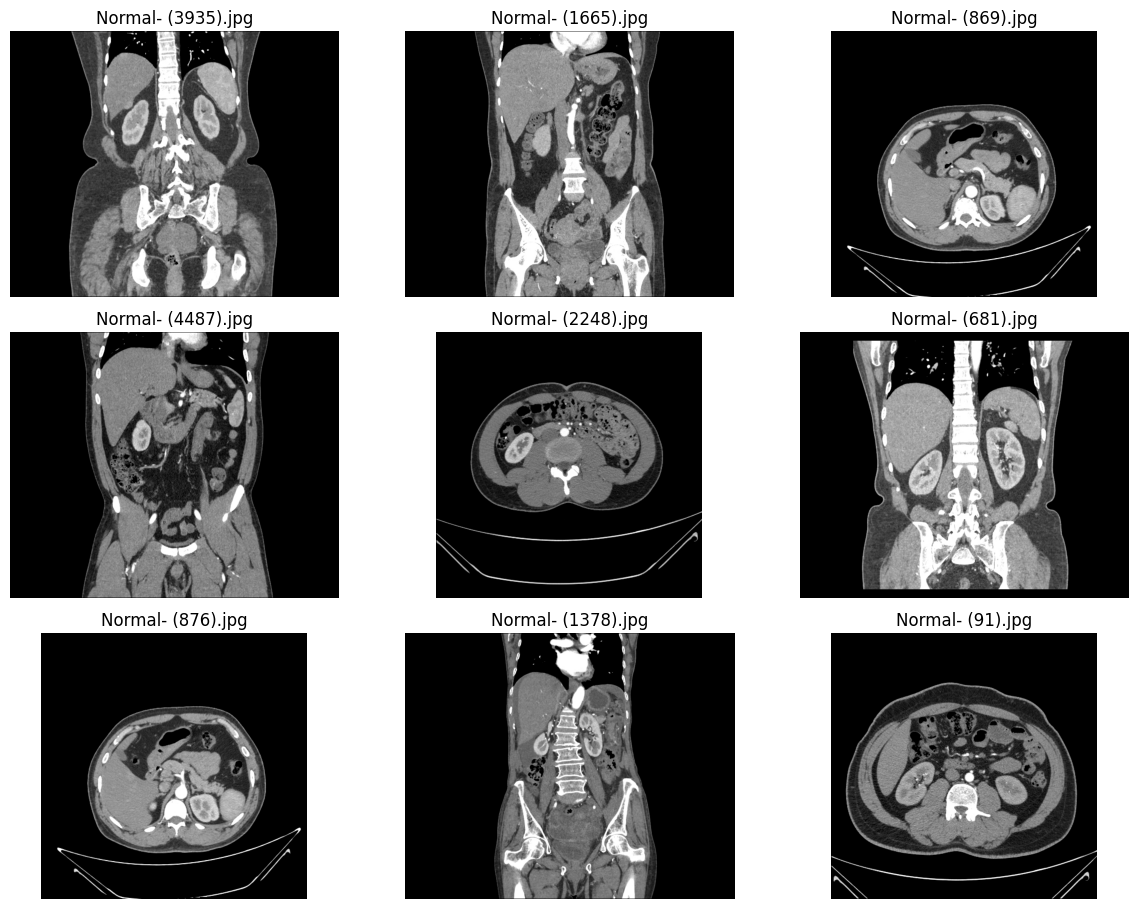

In [15]:
import matplotlib.pyplot as plt
import numpy as np
import os

PATH1 = "D:\\Final Year Project\\Capstone-Project\\artifacts\\data_ingestion\\CT Kidney Dataset\\Normal"

images = os.listdir(PATH1)
print(f'There are {len(os.listdir(PATH1))} pictures of Normal.')

fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(12,10))

for indx, axis in enumerate(axes.flatten()):
    rnd_indx = np.random.randint(0, len(images))
    img = plt.imread(os.path.join(PATH1, images[rnd_indx]))
    imgplot = axis.imshow(img)
    
    axis.set_title(images[rnd_indx])
    axis.set_axis_off()
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

There are 3709 pictures of Cyst.


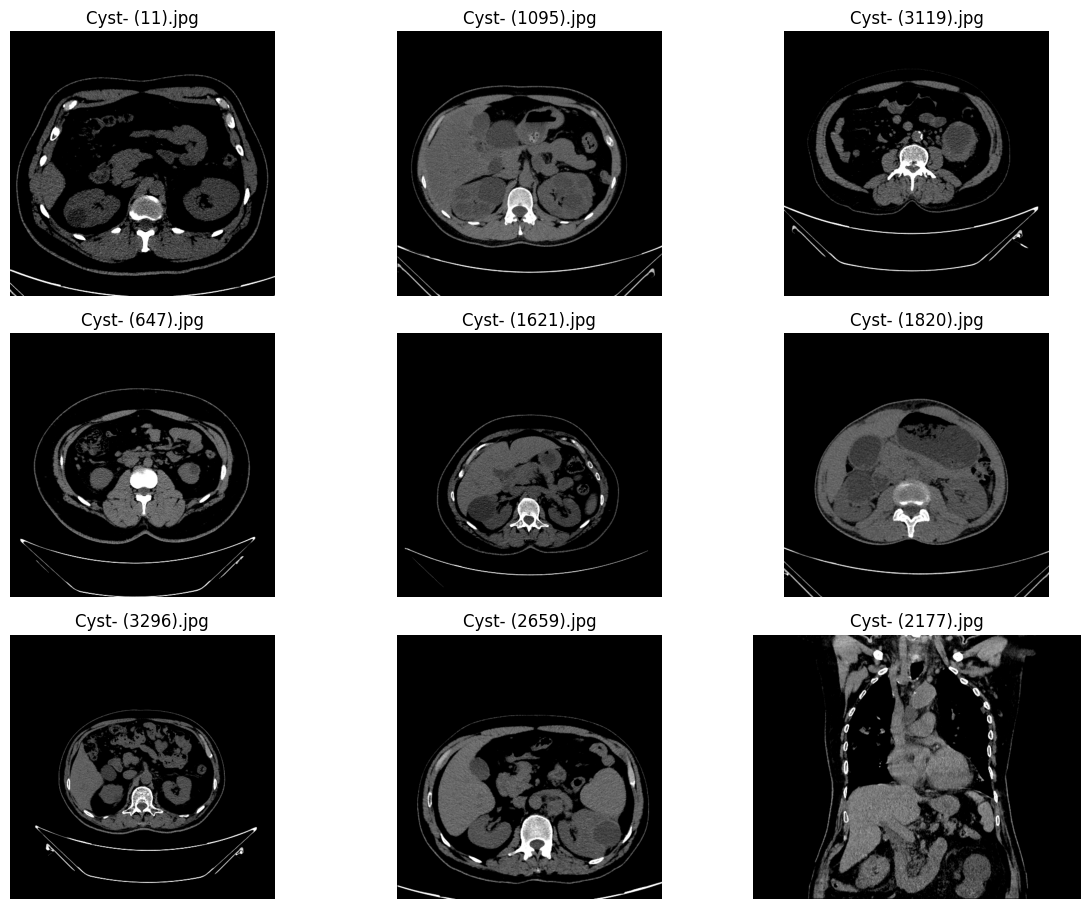

In [9]:
import os
import matplotlib.pyplot as plt
import numpy as np

PATH2 = "D:\\Final Year Project\\Capstone-Project\\artifacts\\data_ingestion\\CT Kidney Dataset\\Cyst"

images = os.listdir(PATH2)
print(f'There are {len(images)} pictures of Cyst.')

fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(12,10))

for indx, axis in enumerate(axes.flatten()):
    rnd_indx = np.random.randint(0, len(images))  # Generate random index within the range of available images
    img = plt.imread(os.path.join(PATH2, images[rnd_indx]))
    imgplot = axis.imshow(img)
    
    axis.set_title(images[rnd_indx])
    axis.set_axis_off()

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


There are 1377 pictures of Stone.


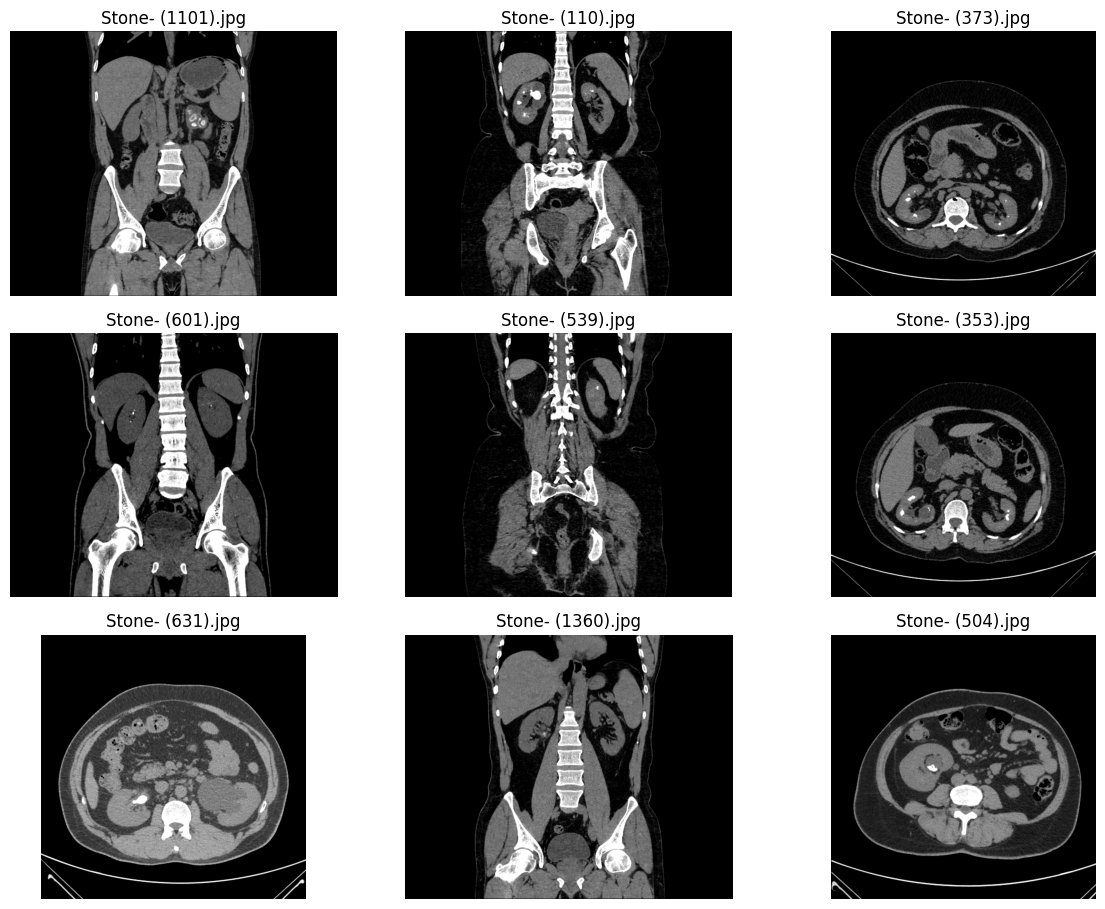

In [11]:
import matplotlib.pyplot as plt
import numpy as np
import os

PATH3 = "D:\\Final Year Project\\Capstone-Project\\artifacts\\data_ingestion\\CT Kidney Dataset\\Stone"

images = os.listdir(PATH3)
print(f'There are {len(os.listdir(PATH3))} pictures of Stone.')

fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(12,10))

for indx, axis in enumerate(axes.flatten()):
    rnd_indx = np.random.randint(0, len(os.listdir(PATH3)))
    img = plt.imread(os.path.join(PATH3, images[rnd_indx]))
    imgplot = axis.imshow(img)
    
    axis.set_title(images[rnd_indx])
    axis.set_axis_off()
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

There are 2283 pictures of Tumor.


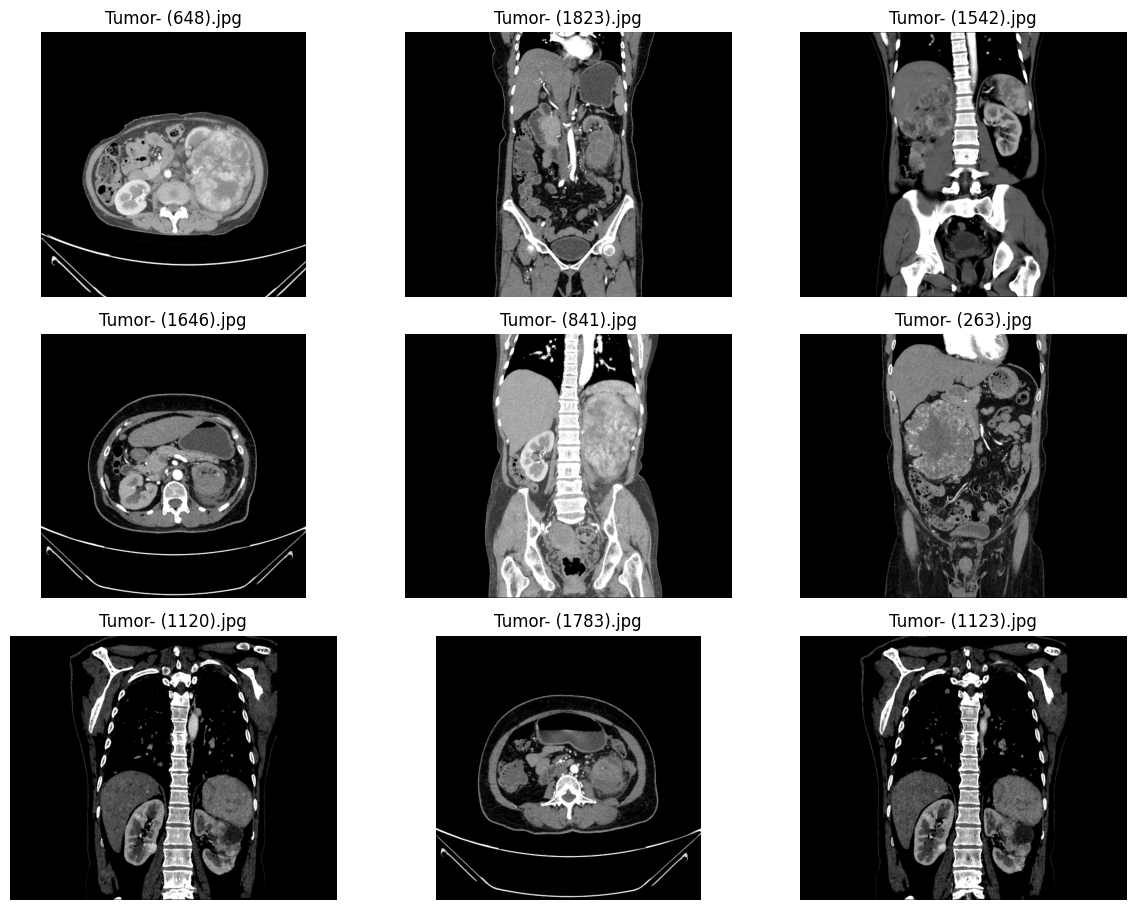

In [13]:
import matplotlib.pyplot as plt
import numpy as np
import os

PATH4 = "D:\\Final Year Project\\Capstone-Project\\artifacts\\data_ingestion\\CT Kidney Dataset\\Tumor"

images = os.listdir(PATH4)
print(f'There are {len(os.listdir(PATH4))} pictures of Tumor.')

fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(12,10))

for indx, axis in enumerate(axes.flatten()):
    rnd_indx = np.random.randint(0, len(os.listdir(PATH4)))
    img = plt.imread(os.path.join(PATH4, images[rnd_indx]))
    imgplot = axis.imshow(img)
    
    axis.set_title(images[rnd_indx])
    axis.set_axis_off()
plt.tight_layout(rect=[0, 0.03, 1, 0.95])


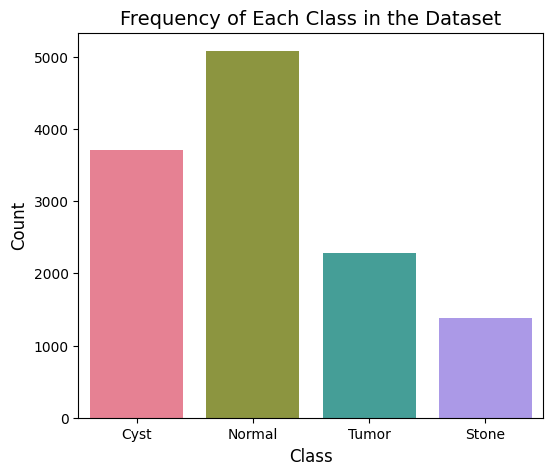

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns
import os

PATH1 = "D:\\Final Year Project\\Capstone-Project\\artifacts\\data_ingestion\\CT Kidney Dataset\\Cyst"
PATH2 = "D:\\Final Year Project\\Capstone-Project\\artifacts\\data_ingestion\\CT Kidney Dataset\\Normal"
PATH3 = "D:\\Final Year Project\\Capstone-Project\\artifacts\\data_ingestion\\CT Kidney Dataset\\Tumor"
PATH4 = "D:\\Final Year Project\\Capstone-Project\\artifacts\\data_ingestion\\CT Kidney Dataset\\Stone"

class_names = ['Cyst', 'Normal', 'Tumor', 'Stone'] 

cyst_count = len(os.listdir(PATH1))
normal_count = len(os.listdir(PATH2))
tumor_count = len(os.listdir(PATH3))
stone_count = len(os.listdir(PATH4))

images = [cyst_count, normal_count, tumor_count, stone_count]

plt.figure(figsize=(6,5))
sns.barplot(x=class_names, y=images, hue=class_names, palette="husl", legend=False)
plt.title('Frequency of Each Class in the Dataset', fontsize=14)
plt.xlabel('Class', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(range(len(images)), class_names)
plt.show()


In [5]:
from dataclasses import dataclass
from pathlib import Path


@dataclass(frozen=True)
class TrainingConfig:
    root_dir: Path
    trained_model_path: Path
    updated_base_model_path: Path
    training_data: Path
    params_epoch: int  
    params_image_size: list

In [6]:
from src.KidneyProject.constants import *
from src.KidneyProject.utils.common import read_yaml,create_directories
import tensorflow as tf  

In [7]:
class ConfigurationManager:
    def __init__(
        self,
        config_filepath = CONFIG_FILE_PATH,
        params_filepath = PARAMS_FILE_PATH):
        
        self.config = read_yaml(config_filepath) 
        self.params = read_yaml(params_filepath) 
    
    def get_training_path(self) -> TrainingConfig:
        training = self.config.training    
        prepare_base_model = self.config.prepare_base_model
        params = self.params
        training_data = os.path.join(self.config.data_ingestion.unzip_dir,"CT Kidney Dataset")
        create_directories([
            Path(training.root_dir)
        ]) 
        
        training_config = TrainingConfig(
            root_dir=Path(training.root_dir),
            trained_model_path=Path(training.trained_model_path),
            updated_base_model_path = Path(prepare_base_model.updated_base_model_path),
            training_data=Path(training_data),
            params_epoch=params.EPOCHS,  
            params_image_size=params.IMAGE_SIZE
        )  
        
        return training_config 

In [8]:
import os
import urllib.request as request 
from zipfile import ZipFile 
import tensorflow as tf
import time

In [9]:
class Training:
    def __init__(self, config: TrainingConfig):
        self.config = config

    def get_base_model(self):
        self.model = tf.keras.models.load_model(
            self.config.updated_base_model_path
        )
        self.model.summary()

    def train_valid_generator(self):
        datagenerator_kwargs = dict(
            rescale=1.0 / 255.0,
            validation_split=0.1
        )
        self.callback = tf.keras.callbacks.EarlyStopping(
            monitor="val_loss",
            min_delta=0.0001,
            patience=5,
            verbose=1,
            mode="auto",
            baseline=None,
            restore_best_weights=False
        )
 
        self.train_generator = tf.keras.utils.image_dataset_from_directory(
            directory=self.config.training_data,
            image_size=self.config.params_image_size[:-1], 
            validation_split=0.1,
            subset="training",
            seed=123,
            label_mode='categorical'
        )

        self.valid_generator = tf.keras.utils.image_dataset_from_directory(
            directory=self.config.training_data,
            image_size=self.config.params_image_size[:-1], 
            validation_split=0.2,
            subset="validation",
            seed=123,
            label_mode='categorical'
        )

    @staticmethod
    def save_model(path: Path, model: tf.keras.Model):
        model.save(path)

    def train(self):
        self.model.fit(
            self.train_generator,
            epochs=self.config.params_epoch,
            validation_data=self.valid_generator,
            callbacks=self.callback
        )

        self.save_model(
            path=self.config.trained_model_path,
            model=self.model
        )

In [11]:
try:
    config = ConfigurationManager()
    training_config = config.get_training_path()
    training = Training(config=training_config)
    training.get_base_model()
    training.train_valid_generator()
    training.train()  
except Exception as e:
    raise e     

[2024-02-29 09:49:55,515: INFO: common: yaml file: config\config.yaml loaded successfully]
[2024-02-29 09:49:55,518: INFO: common: yaml file: params.yaml loaded successfully]
[2024-02-29 09:49:55,519: INFO: common: created directory at: artifacts\training]


Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

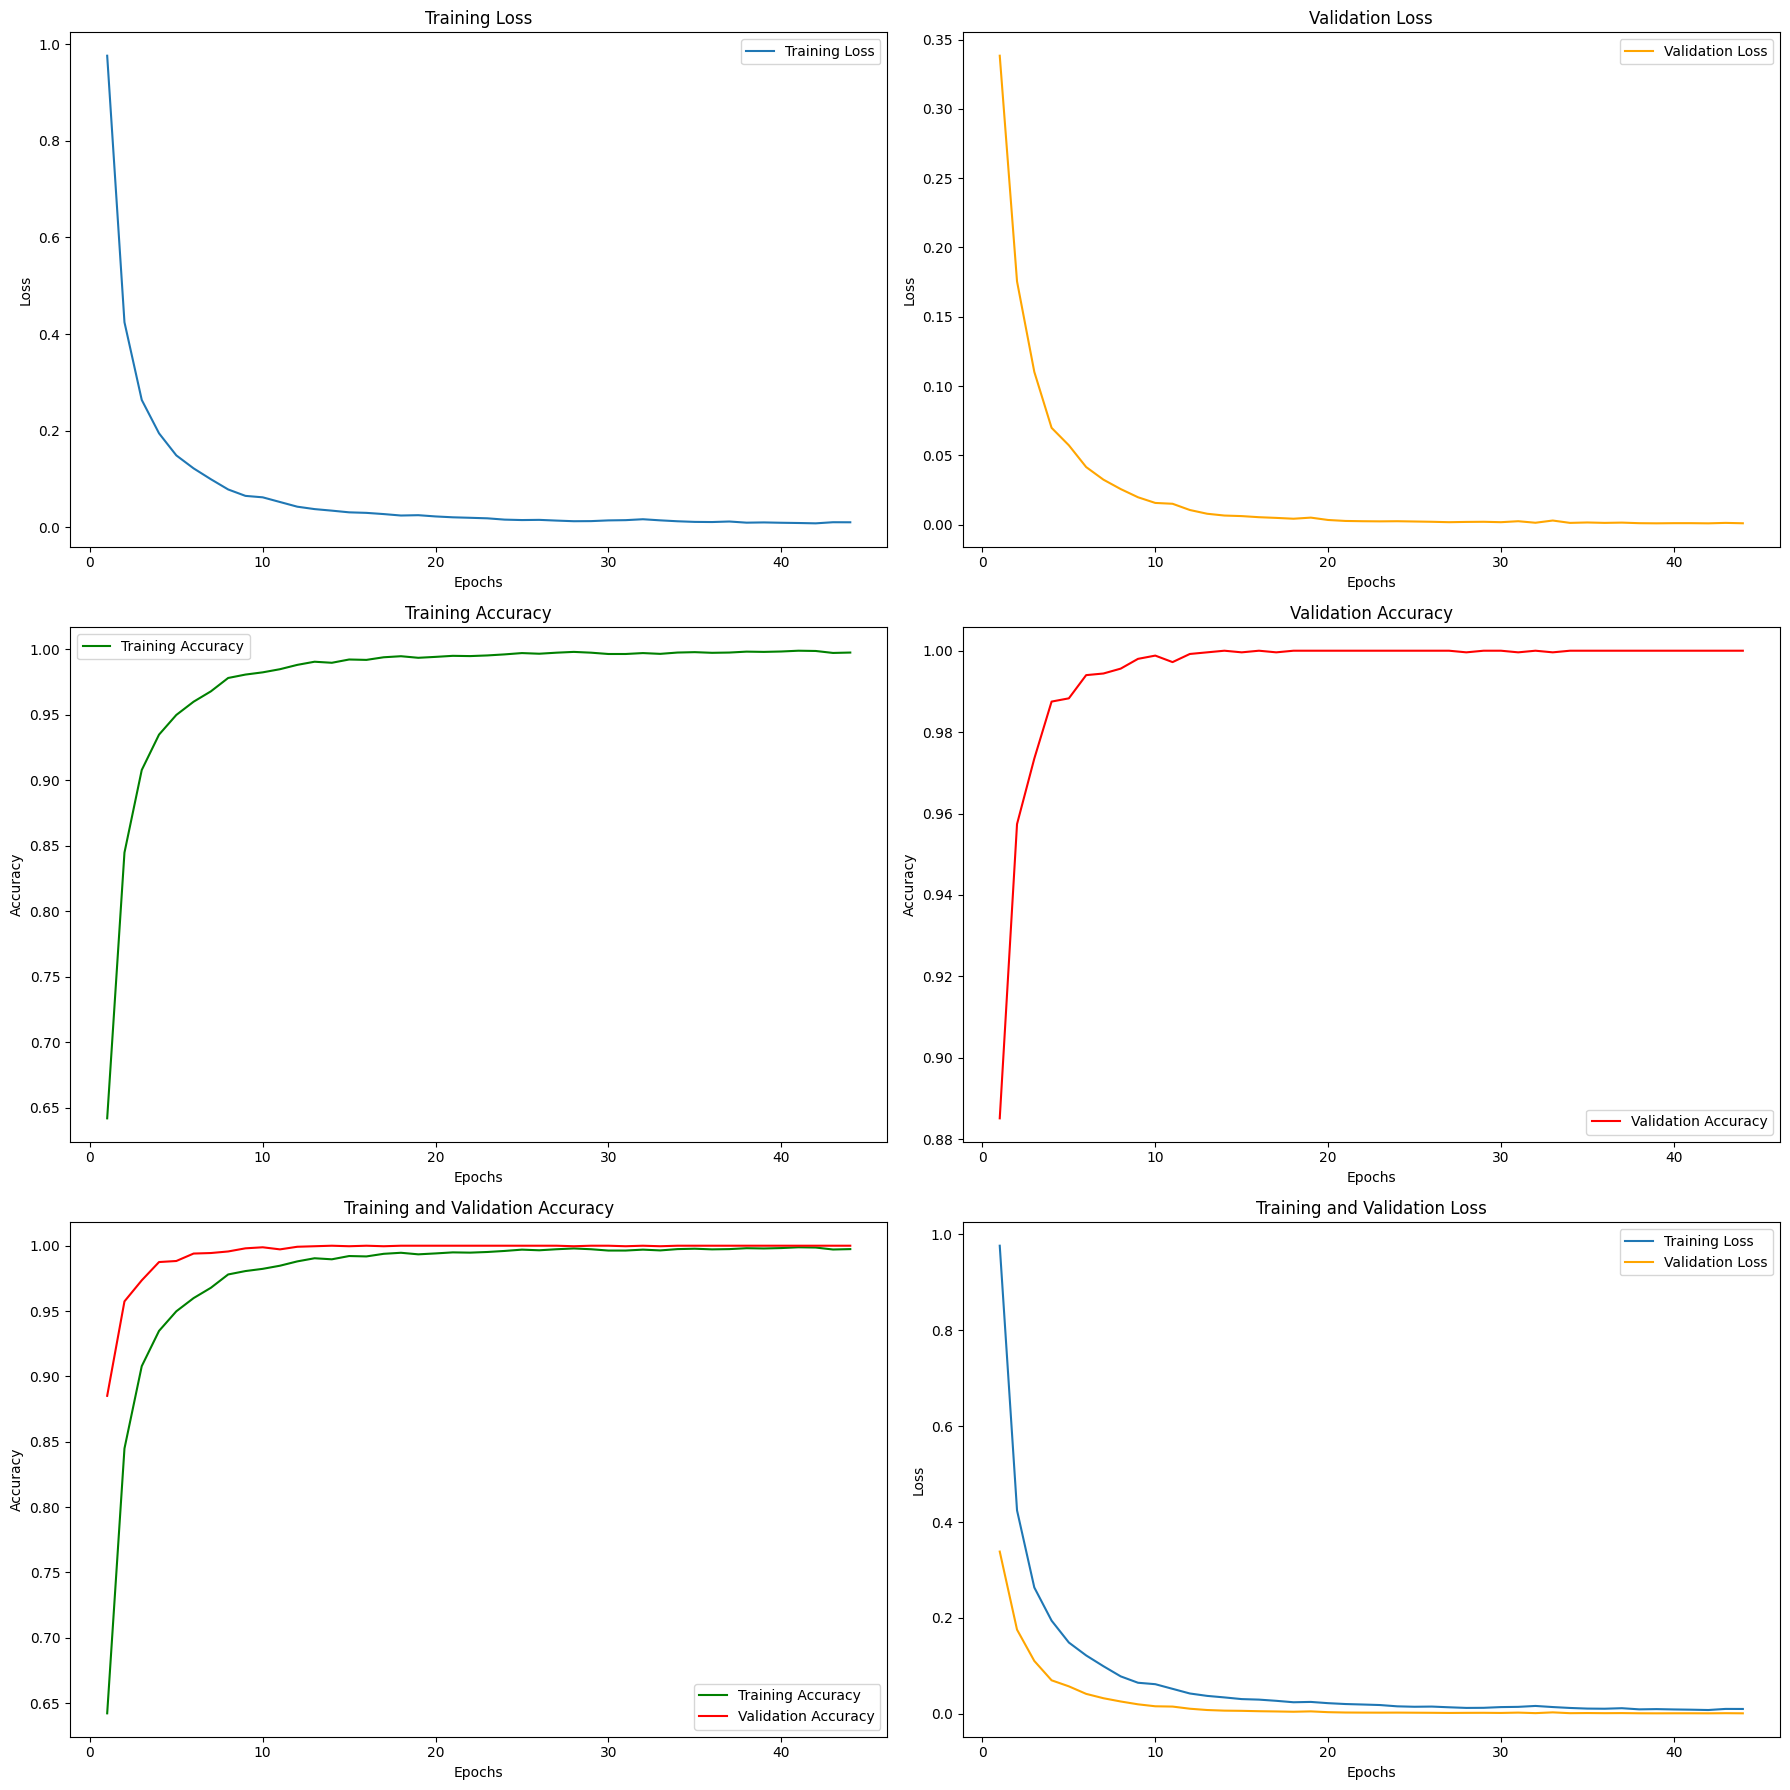

In [1]:
import matplotlib.pyplot as plt

# Define the data
epochs = list(range(1, 45))  # Number of epochs
loss = [0.9766, 0.4244, 0.2635, 0.1943, 0.1486, 0.1217, 0.0992, 0.0780, 0.0647, 0.0617, 0.0520, 0.0423, 0.0373, 0.0341, 0.0306, 0.0295, 0.0270, 0.0240, 0.0247, 0.0221, 0.0203, 0.0193, 0.0182, 0.0155, 0.0146, 0.0150, 0.0135, 0.0122, 0.0124, 0.0139, 0.0144, 0.0163, 0.0140, 0.0121, 0.0108, 0.0105, 0.0116, 0.0092, 0.0097, 0.0090, 0.0085, 0.0078, 0.0101, 0.0100]
accuracy = [0.6421, 0.8448, 0.9078, 0.9348, 0.9498, 0.9599, 0.9678, 0.9780, 0.9806, 0.9823, 0.9847, 0.9880, 0.9904, 0.9896, 0.9921, 0.9918, 0.9938, 0.9946, 0.9934, 0.9941, 0.9949, 0.9947, 0.9952, 0.9960, 0.9970, 0.9965, 0.9973, 0.9979, 0.9973, 0.9963, 0.9963, 0.9970, 0.9964, 0.9974, 0.9977, 0.9972, 0.9974, 0.9981, 0.9979, 0.9982, 0.9988, 0.9986, 0.9971, 0.9974]
val_loss = [0.3384, 0.1755, 0.1102, 0.0698, 0.0572, 0.0415, 0.0324, 0.0256, 0.0197, 0.0156, 0.0150, 0.0105, 0.0078, 0.0065, 0.0061, 0.0053, 0.0048, 0.0042, 0.0050, 0.0033, 0.0026, 0.0024, 0.0023, 0.0024, 0.0022, 0.0020, 0.0017, 0.0019, 0.0020, 0.0017, 0.0024, 0.0013, 0.0029, 0.0012, 0.0015, 0.0012, 0.0014, 9.8390e-04, 8.8108e-04, 0.0010, 0.0010, 8.7124e-04, 0.0012, 9.2038e-04]
val_accuracy = [0.8851, 0.9574, 0.9735, 0.9875, 0.9883, 0.9940, 0.9944, 0.9956, 0.9980, 0.9988, 0.9972, 0.9992, 0.9996, 1.0000, 0.9996, 1.0000, 0.9996, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 0.9996, 1.0000, 1.0000,0.9996, 1.0000, 0.9996, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000]

# Plotting the graphs
plt.figure(figsize=(18, 18))

# Loss
plt.subplot(3, 2, 1)
plt.plot(epochs, loss, label='Training Loss')
plt.title('Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Validation Loss
plt.subplot(3, 2, 2)
plt.plot(epochs, val_loss, label='Validation Loss', color='orange')
plt.title('Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Accuracy
plt.subplot(3, 2, 3)
plt.plot(epochs, accuracy, label='Training Accuracy', color='green')
plt.title('Training Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Validation Accuracy
plt.subplot(3, 2, 4)
plt.plot(epochs, val_accuracy, label='Validation Accuracy', color='red')
plt.title('Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Accuracy vs Validation Accuracy
plt.subplot(3, 2, 5)
plt.plot(epochs, accuracy, label='Training Accuracy', color='green')
plt.plot(epochs, val_accuracy, label='Validation Accuracy', color='red')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Loss vs Validation Loss
plt.subplot(3, 2, 6)
plt.plot(epochs, loss, label='Training Loss')
plt.plot(epochs, val_loss, label='Validation Loss', color='orange')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()
